In [8]:
import orjson
import pandas as pd
import matplotlib.pyplot as plt
import spacy

In [2]:
f = open('json_corpus\mpqa_csds.json', encoding='utf-8')
csds = orjson.loads(f.read())
f.close()

In [29]:
attitude_free_ds = pd.DataFrame(columns=['unique_id', 'head', 'pos'])
regular_ds = pd.DataFrame(columns=['unique_id', 'head', 'pos'])
ose = pd.DataFrame(columns=['unique_id', 'head', 'pos'])
es = pd.DataFrame(columns=['unique_id', 'head', 'pos'])
attitudes = pd.DataFrame(columns=['unique_id', 'head', 'pos'])

nlp = spacy.load('en_core_web_sm')

In [30]:
for annotation in csds:
    if annotation['annotation_type'] == 'direct_subjective':
        attitude_links = list(annotation['attitude_link'])
        if len(attitude_links) == 0:
            doc = nlp(annotation['head'])
            for token in doc:
                if not token.is_stop and not token.is_space:
                    attitude_free_ds.loc[len(attitude_free_ds.index)] = [annotation['unique_id'],
                                                                         token.text,
                                                                         token.pos_]
        else:
            doc = nlp(annotation['head'])
            for token in doc:
                if not token.is_stop and not token.is_space:
                    regular_ds.loc[len(regular_ds.index)] = [annotation['unique_id'],
                                                                         token.text,
                                                                         token.pos_]
    elif annotation['annotation_type'] == 'objective_speech_event':
        doc = nlp(annotation['head'])
        for token in doc:
            if not token.is_stop and not token.is_space:
                ose.loc[len(ose.index)] = [annotation['unique_id'],
                                         token.text,
                                         token.pos_]
    elif annotation['annotation_type'] == 'expressive_subjectivity':
        doc = nlp(annotation['head'])
        for token in doc:
            if not token.is_stop and not token.is_space:
                es.loc[len(es.index)] = [annotation['unique_id'],
                                         token.text,
                                         token.pos_]
    elif 'attitude' in annotation['unique_id']:
        doc = nlp(annotation['head'])
        for token in doc:
            if not token.is_stop and not token.is_space:
                attitudes.loc[len(attitudes.index)] = [annotation['unique_id'],
                                         token.text,
                                         token.pos_]

In [34]:
ose

,unique_id,head,pos
0,non_fbis/06.12.31-26764&&objective-speech-even...,Elaborating,VERB
1,non_fbis/06.12.31-26764&&objective-speech-even...,elaborated,VERB
2,non_fbis/06.12.31-26764&&objective-speech-event-2,State,PROPN
3,non_fbis/06.12.31-26764&&objective-speech-event-2,Union,PROPN
4,non_fbis/06.12.31-26764&&objective-speech-event-2,address,NOUN
...,...,...,...
4827,xbank/wsj_0583&&objective-speech-event-2085,echoed,VERB
4828,xbank/wsj_0583&&objective-speech-event-2210,said,VERB
4829,xbank/wsj_0583&&objective-speech-event-2081,announced,VERB
4830,xbank/wsj_0583&&objective-speech-event-2217,announced,VERB


In [35]:
attitude_free_ds

,unique_id,head,pos
0,non_fbis/11.14.43-703&&direct-subjective-125,said,VERB
1,non_fbis/11.14.43-703&&direct-subjective-123,asked,VERB
2,non_fbis/11.14.43-703&&direct-subjective-107,like,VERB
3,non_fbis/11.14.43-703&&direct-subjective-105,went,VERB
4,non_fbis/11.14.43-703&&direct-subjective-99,said,VERB
...,...,...,...
6632,xbank/wsj_0610&&direct-subjective-2194,long,ADJ
6633,xbank/wsj_0610&&direct-subjective-2194,-,PUNCT
6634,xbank/wsj_0610&&direct-subjective-2194,term,NOUN
6635,xbank/wsj_0610&&direct-subjective-2194,outlook,NOUN


In [36]:
regular_ds

,unique_id,head,pos
0,non_fbis/06.12.31-26764&&direct-subjective-190,set,VERB
1,non_fbis/06.12.31-26764&&direct-subjective-146,fear,NOUN
2,non_fbis/06.12.31-26764&&direct-subjective-106,label,NOUN
3,non_fbis/06.12.31-26764&&direct-subjective-50,particularly,ADV
4,non_fbis/06.12.31-26764&&direct-subjective-50,disturbed,VERB
...,...,...,...
7451,xbank/wsj_0583&&direct-subjective-2216,said,VERB
7452,xbank/wsj_0583&&direct-subjective-2194,said,VERB
7453,xbank/wsj_0583&&direct-subjective-2123,grim,ADJ
7454,xbank/wsj_0583&&direct-subjective-2123,demeanors,NOUN


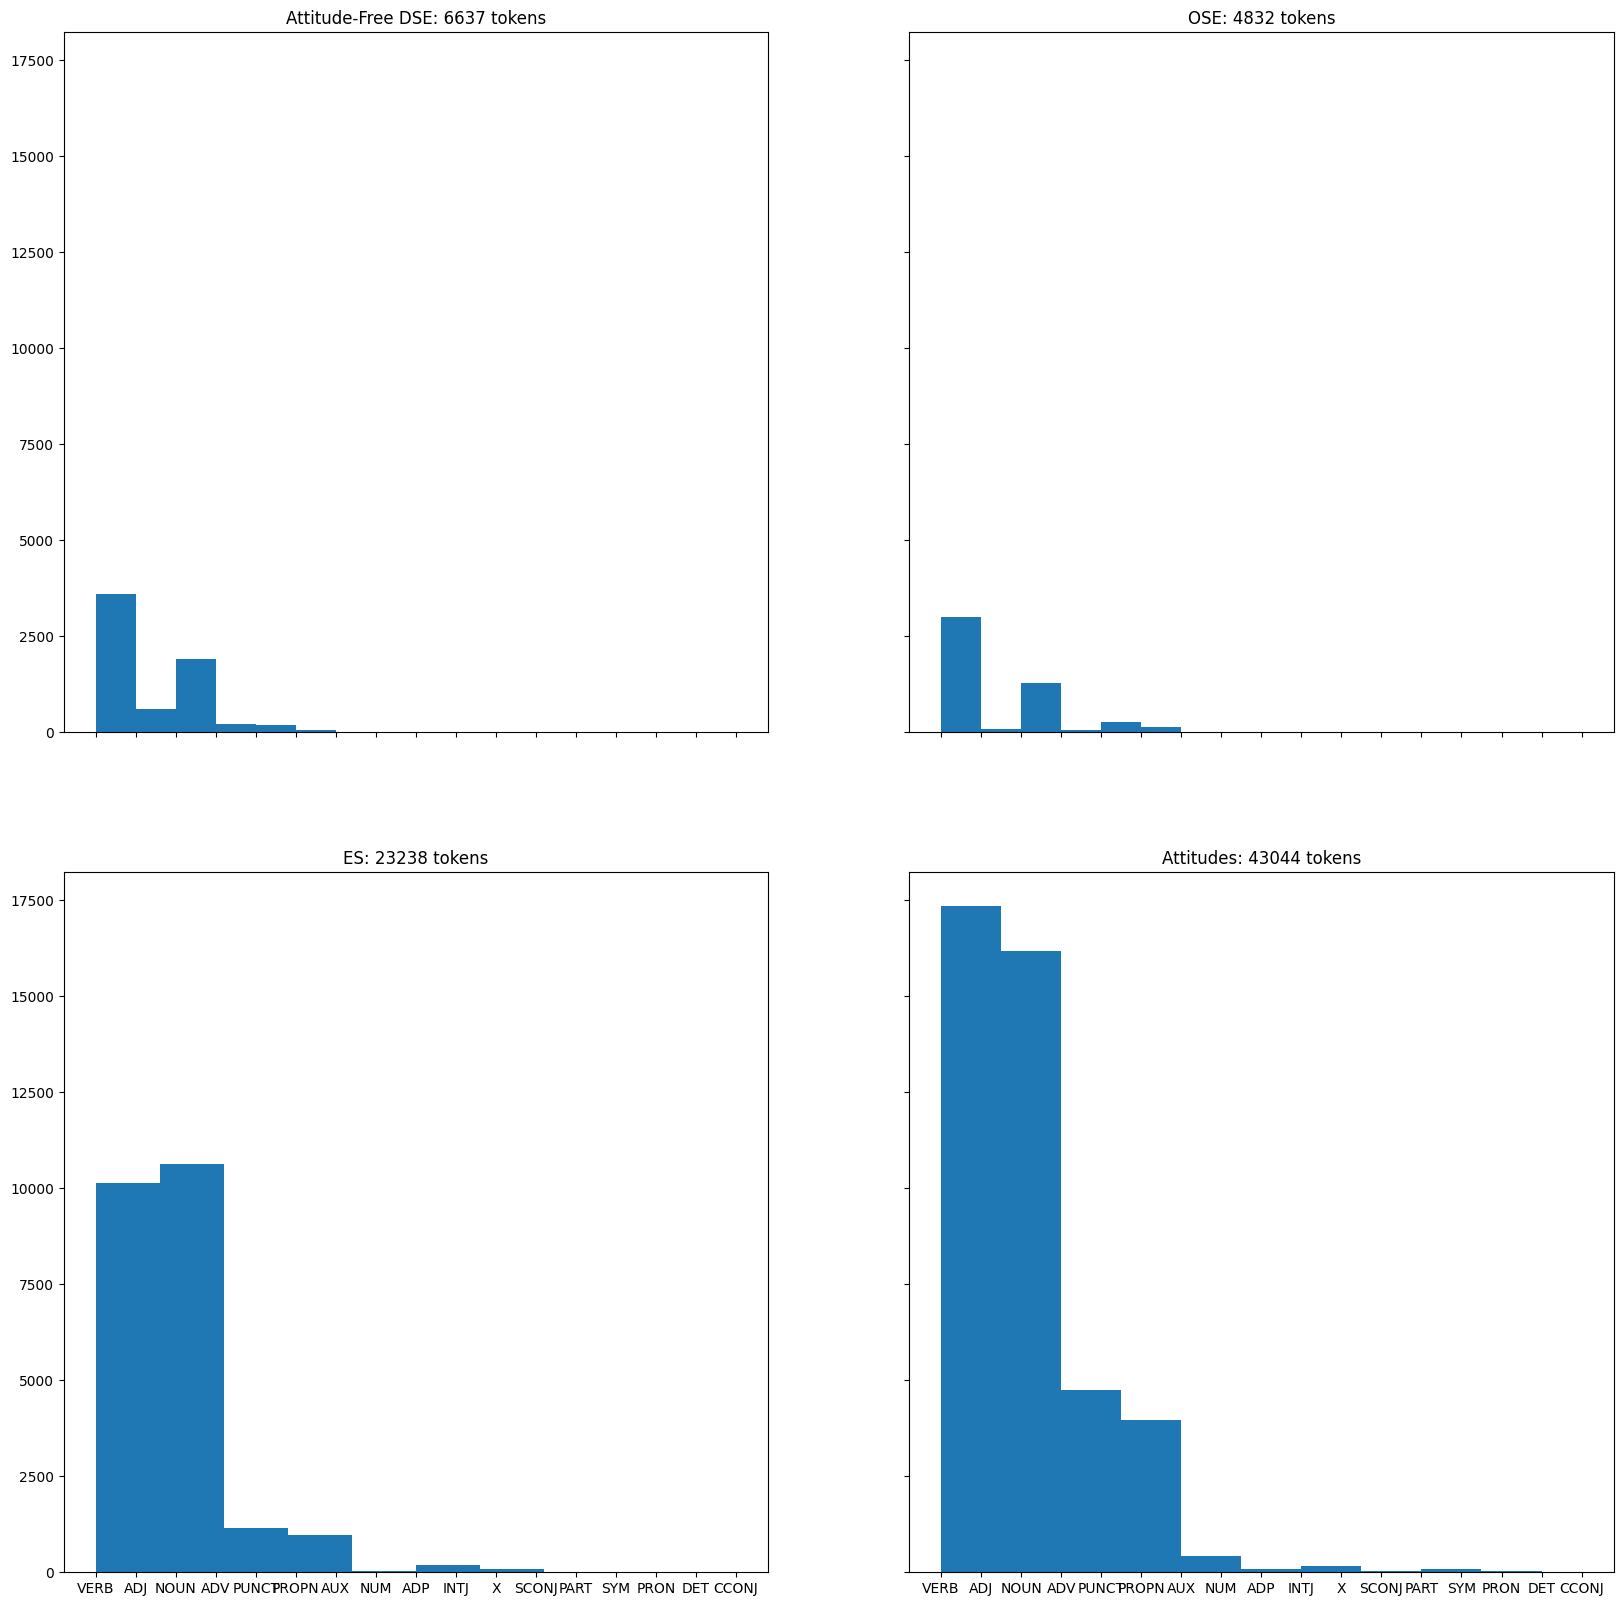

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20), sharex=True, sharey=True)
axes[0, 0].set_title(f'Attitude-Free DSE: {len(attitude_free_ds.index)} tokens')
axes[0, 0].hist(attitude_free_ds['pos'])

axes[0, 1].set_title(f'OSE: {len(ose.index)} tokens')
axes[0, 1].hist(ose['pos'])

axes[1, 0].set_title(f'ES: {len(es.index)} tokens')
axes[1, 0].hist(es['pos'])

axes[1, 1].set_title(f'Attitudes: {len(attitudes.index)} tokens')
axes[1, 1].hist(attitudes['pos'])


plt.show()